In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

DATA_FILE = '/content/drive/MyDrive/uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [40]:
pip install basemap


In [43]:
%matplotlib inline

In [44]:
DATA_FILE = '/content/drive/MyDrive/uber-raw-data-aug14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


In [45]:
uber_data.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base'], dtype='object')

In [46]:
uber_data.shape

(829275, 4)

In [47]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  829275 non-null  object 
 1   Lat        829275 non-null  float64
 2   Lon        829275 non-null  float64
 3   Base       829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [48]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

In [49]:
uber_data

,Date/Time,Lat,Lon,Base,DayOfWeekNum,MonthDayNum,HourOfDay
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,1,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,1,0
2,2014-08-01 00:12:00,40.7209,-74.0507,B02512,4,1,0
3,2014-08-01 00:12:00,40.7387,-73.9856,B02512,4,1,0
4,2014-08-01 00:12:00,40.7323,-74.0077,B02512,4,1,0
...,...,...,...,...,...,...,...
829270,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,31,23
829271,2014-08-31 23:55:00,40.7552,-73.9753,B02764,6,31,23
829272,2014-08-31 23:55:00,40.7617,-73.9788,B02764,6,31,23
829273,2014-08-31 23:59:00,40.7395,-73.9889,B02764,6,31,23


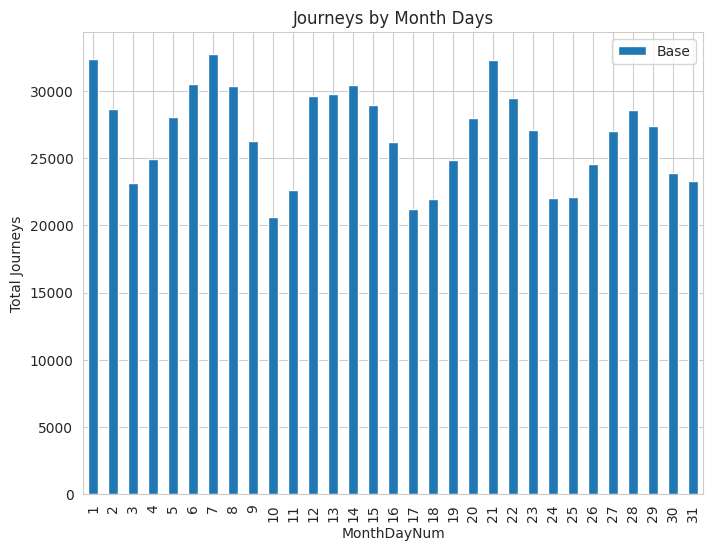

In [50]:
uber_weekdays = uber_data.pivot_table(index=['MonthDayNum'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Month Days');

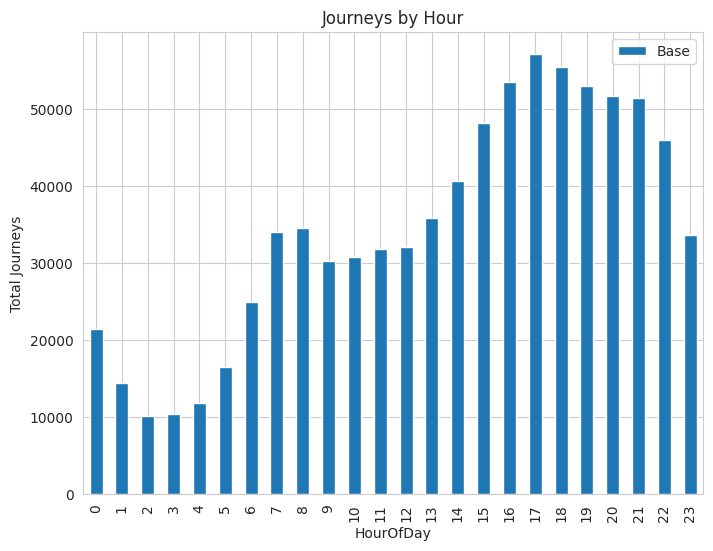

In [51]:
uber_weekdays = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

In [52]:
uber_data.head(2)

,Date/Time,Lat,Lon,Base,DayOfWeekNum,MonthDayNum,HourOfDay
0,2014-08-01 00:03:00,40.7366,-73.9906,B02512,4,1,0
1,2014-08-01 00:09:00,40.7260,-73.9918,B02512,4,1,0


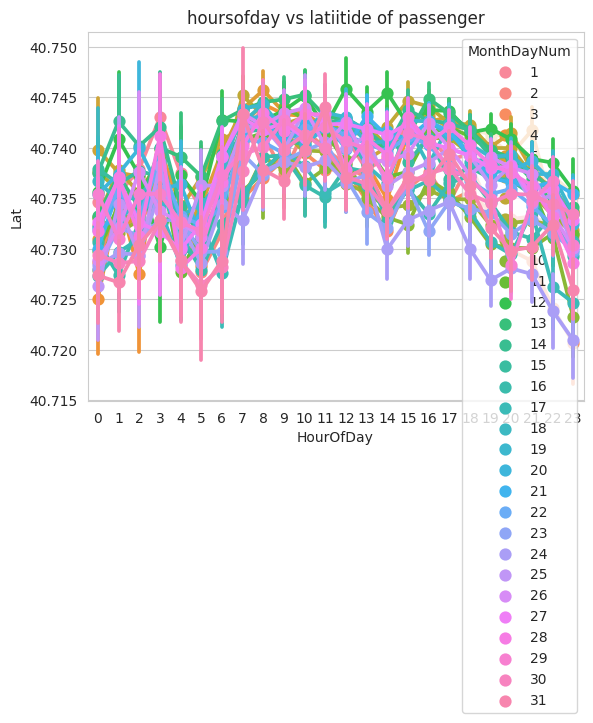

In [53]:
sns.set_style('whitegrid')
ax = sns.pointplot(x="HourOfDay", y="Lat", hue="MonthDayNum", data=uber_data)
ax.set_title('hoursofday vs latiitide of passenger')
plt.show()

<ipython-input-54-7f03b7c41bcd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(uber_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


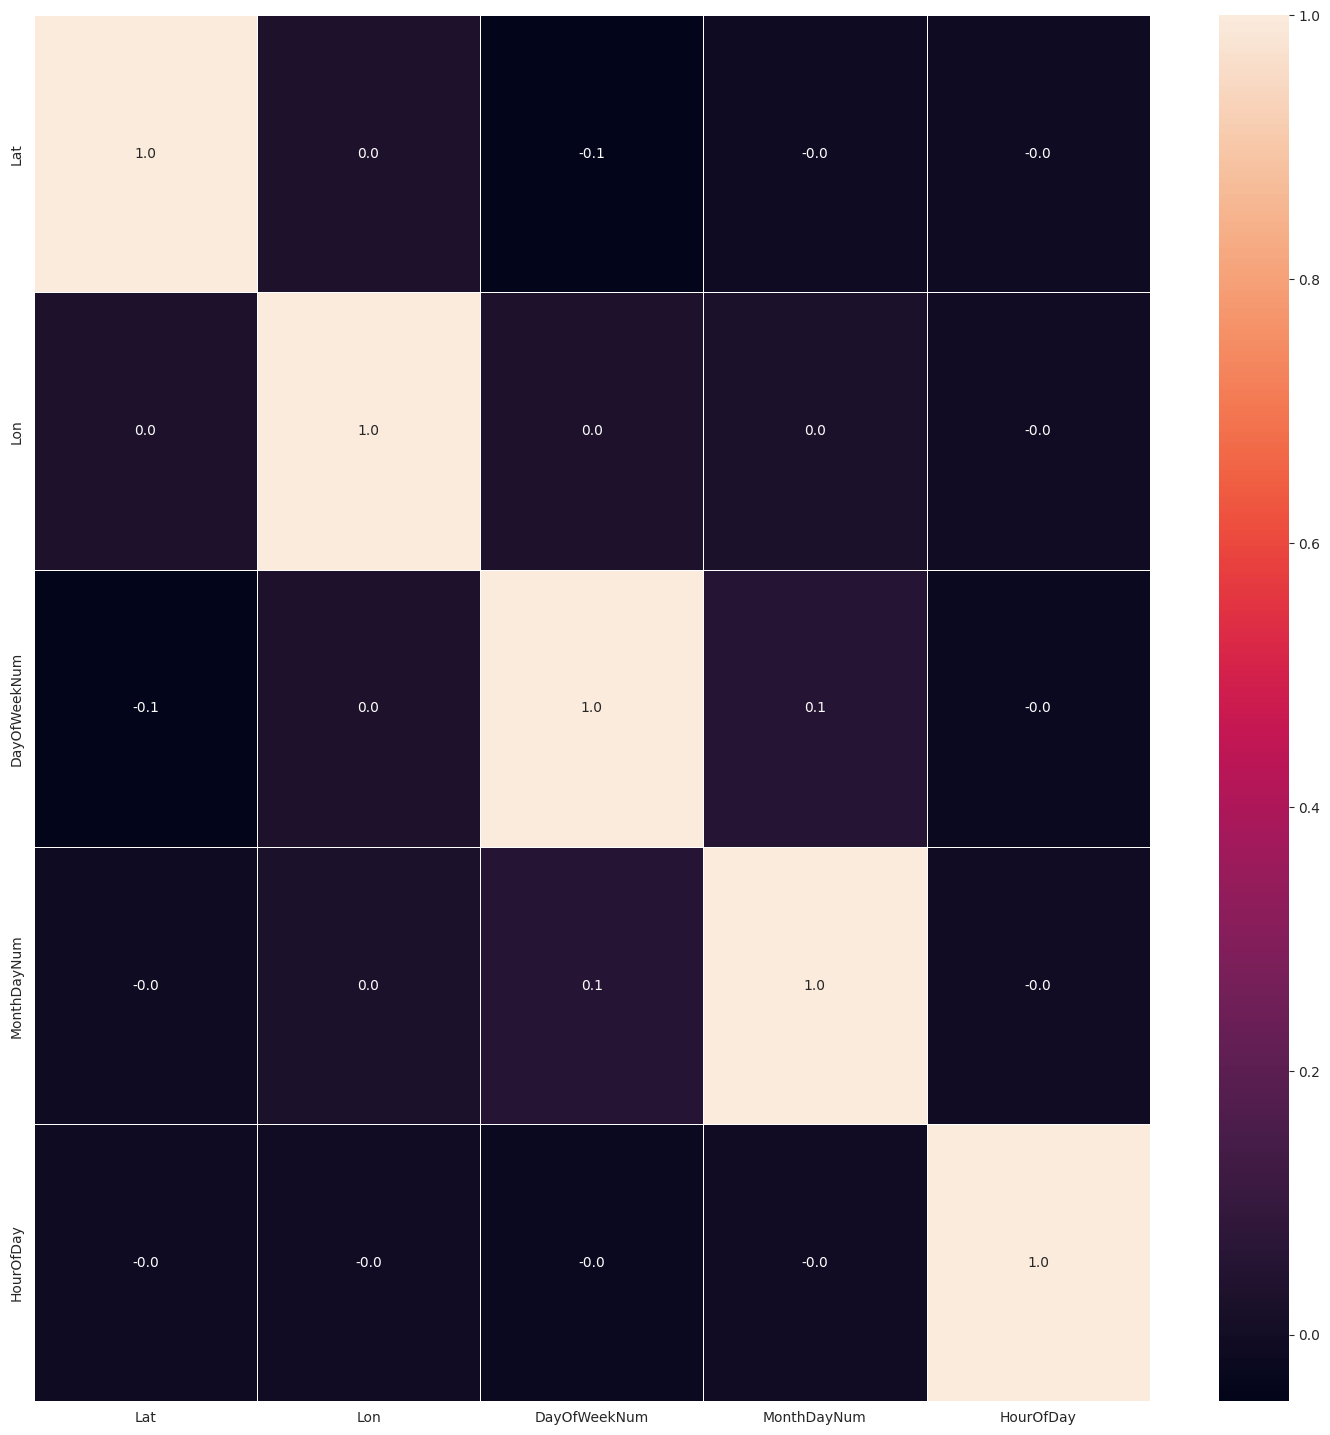

In [54]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(uber_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

Text(0, 0.5, 'MonthDayNum')

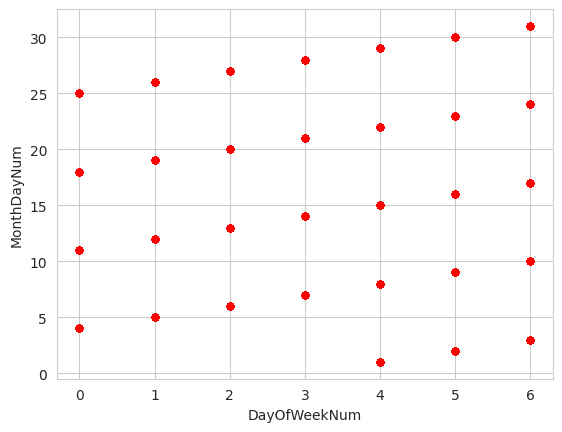

In [55]:
uber_data.plot(kind='scatter', x='DayOfWeekNum', y='MonthDayNum',alpha = 0.5,color = 'red')
plt.xlabel('DayOfWeekNum')
plt.ylabel('MonthDayNum')

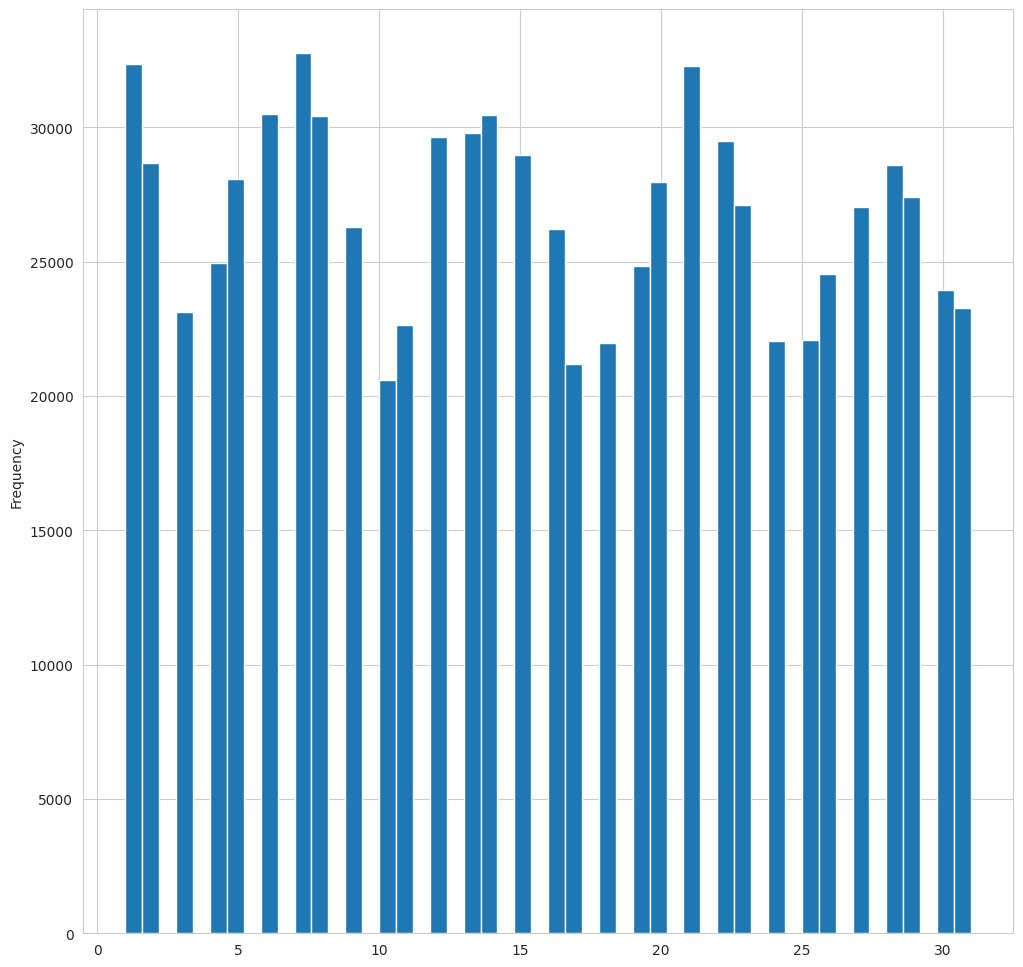

In [56]:
uber_data.MonthDayNum.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

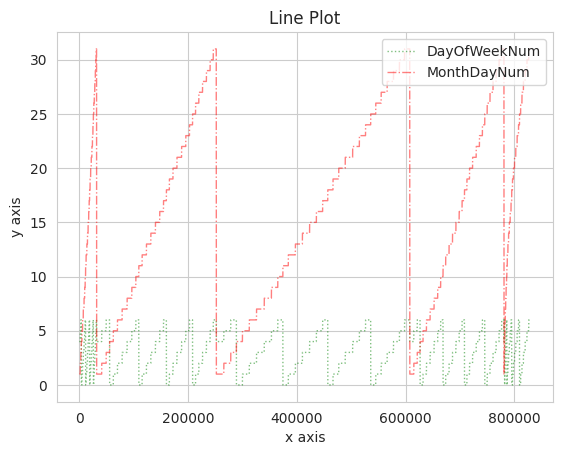

In [57]:
uber_data.DayOfWeekNum.plot(kind = 'line', color = 'g',label = 'DayOfWeekNum',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
uber_data.MonthDayNum.plot(color = 'r',label = 'MonthDayNum',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Line Plot')
plt.show()